# Project 3 Part 1
## Chicago Crime Data

*Christina Brockway*

In [ ]:
!pip install holidays

use a prepared zip file with the Chicago Crime Data:
https://drive.google.com/file/d/1avxUlCAros-R9GF6SKXqM_GopzO7VwA5/view?usp=drive_link

**Original Source is the Chicago Data Portal: Crimes 2001 to Present**

**Data Description**
https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data

-  includes type of crime, exact data/time, lat/long, District/ward, was there an arrest,....

### Data Dictionary

Taken from: data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky"><span style="font-weight:bold">**Name**</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">**dtype**</span></th>
    <th class="tg-0pky"><span style="font-weight:bold">**Description**</span></th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">ID</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">Unique identifier for the record</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Date incident occured</td>
    <td class="tg-0pky">date/time</td>
  </tr>
  <tr>
    <td class="tg-0pky">Primary Type</td>
    <td class="tg-0pky">object</td>
    <td class="tg-0pky">Primary description of the IL Uniform Crime Reporting code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Secondary description of IUCR code</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Location Description</td>
    <td class="tg-0pky">object </td>
    <td class="tg-0pky">Location where incident occurred</td>
    <td class="tg-0pky">categorical</td>
  </tr>
  <tr>
    <td class="tg-0pky">Arrest</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was an arrest made? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Domestic</td>
    <td class="tg-0pky">bool</td>
    <td class="tg-0pky">was the incident domestic related? </td>
    <td class="tg-0pky">true/false</td>
  </tr>
  <tr>
    <td class="tg-0pky">Beat</td>
    <td class="tg-0pky">int64</td>
    <td class="tg-0pky">beat where occured, Beat: smallest geo area deidcate police beat car</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">District</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates district where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Ward</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">indicates city council district/ward where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Latitude</td>
    <td class="tg-0pky">float64 </td>
    <td class="tg-0pky">latitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
  <tr>
    <td class="tg-0pky">Longitude</td>
    <td class="tg-0pky">float64</td>
    <td class="tg-0pky">longitude where occured</td>
    <td class="tg-0pky">numeric</td>
  </tr>
</tbody>
</table>

# Task:
Answer a series of question s about trends in crimes in Chicago for a reporter for a local newspaper.

-  Pick 3 topics to analyze:
  ~  Comparing Police Districts
  ~  Crimes Across the Years
  ~  Comparing AM vs PM Rush Hour
  ~  Comparing Months
  ~  Comparing Holidays
  ~  What cycles(seasonality) can you find this data


### Imports

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import datetime as dt
import statsmodels.tsa.api as tsa

import holidays
from holidays import country_holidays

### Load Data

In [2]:
folder = "data/*Crime*.csv"
crime_files = sorted(glob.glob(folder, recursive=True))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [4]:
dff = df.copy()

In [5]:
#Set format for datetime and change dtype
date_format = "%m/%d/%Y %H:%M:%S %p"

dff['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
dff = dff.sort_values('Datetime')
dff

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022-12-31 12:50:00
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022-12-31 12:50:00
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,2022-12-31 12:52:00
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,2022-12-31 12:52:00


In [11]:
#Set index column to datetime
dff=dff.set_index('Datetime')
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7713109 entries, 2001-01-01 01:00:00 to 2022-12-31 12:59:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [12]:
#Check for null values
dff.isna().sum()

ID                           0
Primary Type                 0
Description                  0
Location Description     10928
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Latitude                 88685
Longitude                88685
dtype: int64

## Comparing Crimes Across the Years

- isolate columns for years
- .count for total number of crimes
- make a visualiztion of the crimes
                 

<Axes: >

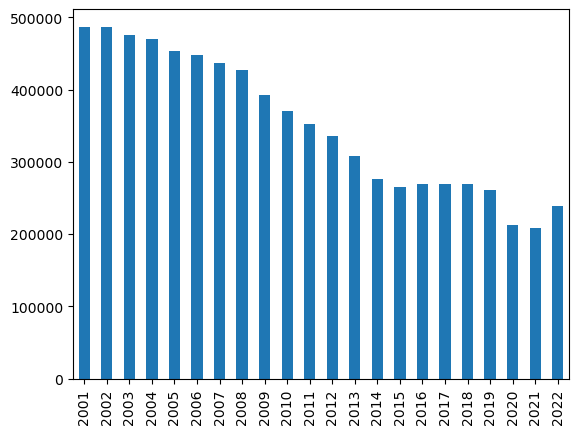

In [18]:
df_years = dff.index.year
df_years.value_counts().sort_index().plot(kind='bar');

#### Is the total number of crimes increasing/decreasing across the years?
***Overall the total number of crimes is decreasing across the years***



#### Are there any individual crimes that are doing the opposite?

In [23]:
#Drop columns not used in this analysis
drop_cols = ['ID', 'Description', 'Location Description', 'Domestic', 'Arrest', 'Beat','Latitude', 'Longitude', 'District', 'Ward']
crimes = df.drop(columns=drop_cols)
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Date          object
 1   Primary Type  object
dtypes: object(2)
memory usage: 176.5+ MB


In [24]:
crimes.nunique()

Date            3172250
Primary Type         36
dtype: int64

In [25]:
#Set format for datetime and change dtype
date_format = "%m/%d/%Y %H:%M:%S %p"

crimes['Datetime'] = pd.to_datetime(df['Date'], format=date_format)
crimes = crimes.sort_values('Datetime')

In [26]:
crimes_si= crimes.set_index('Datetime')

In [27]:
#Inspect the value_counts for differnt types of crimes
ccounts= crimes_si.groupby('Primary Type').resample('Y').sum(numeric_only=False)
ccounts

Date  \
Primary Type      Datetime                                                        
ARSON             2001-12-31  01/03/2001 10:29:44 PM01/04/2001 06:30:00 PM01...   
                  2002-12-31  01/01/2002 01:00:00 AM01/01/2002 03:53:00 PM01...   
                  2003-12-31  01/01/2003 01:27:41 AM01/01/2003 05:55:48 AM01...   
                  2004-12-31  01/01/2004 03:38:00 AM01/01/2004 05:30:00 PM01...   
                  2005-12-31  01/01/2005 12:00:10 PM01/01/2005 12:15:00 AM01...   
...                                                                         ...   
WEAPONS VIOLATION 2018-12-31  01/01/2018 01:10:00 AM01/01/2018 01:17:00 AM01...   
                  2019-12-31  01/01/2019 01:03:00 AM01/01/2019 01:08:00 PM01...   
                  2020-12-31  01/01/2020 01:05:00 AM01/01/2020 01:07:00 AM01...   
                  2021-12-31  01/01/2021 01:00:00 AM01/01/2021 01:04:00 AM01...   
                  2022-12-31  01/01/2022 01:12:00 PM01/01/2022 01:20:00 AM01...   

                                                                   Primary Type  
Primary Type      Datetime                                                       
ARSON             2001-12-31  ARSONARSONARSONARSONARSONARSONARSONARSONARSONA...  
                  2002-12-31  ARSONARSONARSONARSONARSONARSONARSONARSONARSONA...  
                  2003-12-31  ARSONARSONARSONARSONARSONARSONARSONARSONARSONA...  
                  2004-12-31  ARSONARSONARSONARSONARSONARSONARSONARSONARSONA...  
                  2005-12-31  ARSONARSONARSONARSONARSONARSONARSONARSONARSONA...  
...                                                                         ...  
WEAPONS VIOLATION 2018-12-31  WEAPONS VIOLATIONWEAPONS VIOLATIONWEAPONS VIOL...  
                  2019-12-31  WEAPONS VIOLATIONWEAPONS VIOLATIONWEAPONS VIOL...  
                  2020-12-31  WEAPONS VIOLATIONWEAPONS VIOLATIONWEAPONS VIOL...  
                  2021-12-31  WEAPONS VIOLATIONWEAPONS VIOLATIONWEAPONS VIOL...  
                  2022-12-31  WEAPONS VIOLATIONWEAPONS VIOLATIONWEAPONS VIOL...  

[723 rows x 2 columns]

In [28]:
##Create a visualization ofcrime data
x=['Years']
y=['Primary Type']
ccounts.plot(ccounts, x, y,kind='barh', stacked=True)
plt.title('Total Number of Crimes per Year')
plt.xlabel('Number of Crimes')
plt.ylabel('Years');

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
## Comparing Holidays

In [ ]:
#make a date range that covers the full dataset
all_days = pd.date_rande(df['Date'].min(), df['Date'].max))
all_days

In [ ]:
#create an instance of the US only holidays
us_holidays = country_holidays('US')


In [ ]:
#Get a list of all holidays
holidays = [us_holidays.get(day) for day in all_days]
holidays[:5]
            

In [ ]:
df['US Holidays']=[holidays.get(day) for day in df['Date']]
df['US Holidays'].value_counts()

In [ ]:
## Save a binary is holiday feature
df['Is_Holiday'] = df['US Holiday'].notna()
df['Is_Holiday'].value_counts()

In [ ]:
#### What are the top 3 holidays with the largest number of crimes?

In [ ]:
#### For each of the top 3 holidays with the most crime, 
#### what are the top 5 most common crimes on that holiday?